In [4]:
import pandas as pd
import geopandas as gpd

# Import Codes from the full code #
import builder

# Demonstration for the AGILE Paper
### Exploring MapSwipe as a Crowdsourcing Tool for (Rapid) Damage Assessment: The Case of the 2021 Haiti Earthquake

### 1. Loading Data
Four Datasets are loaded.

First the raw dataset containing each individual answer by each user for each tile. This Dataset is not really needed, but since the code was originally constructed for a more in-depth analyis, it needs to be in the constructor later.

Then the aggregated answers, which also contains the geometries of each tile, as well as answer counts and shares for each tile.

The orignal copernicus data is point-based, but since a point can only be in one tile at once, even if the building intersects multiple tiles, we joined the points with the neares building on OpenStreetMap. This decicion was made after carefully examining as many exaples as possible. 

Finally, our reference dataset is loaded.

In [5]:
raw_answers = pd.read_csv('data/results.csv')
agg = gpd.read_file('data/agg_results.geojson')

cop_buildings_moved = gpd.read_file('data/cop_footprints_moved.shp')

reference_agg = gpd.read_file('data/agg_reference.shp')

### 2. Create Project Instances
The input for the Objects are the raw data, the aggregated data the Copernicus buildings and the reference dataset.
Also the filter_bad_im gives the threshold for a picture with a bad image share >= than the threshold. To deactive the threshold, set no input or False.

The Statistics class inherits from the Project class and provides some more methods for user analyses. The we will no explore further in this context.

Some information is outputted while initializing the class.

Info for the GLAD algorithm: Since the GLAD algorithm takes a while to run, the results are loaded from a file. If new MapSwipe data is added, Line 945 in the builder.py has to be reactivated.

In [6]:
project = builder.Project(raw_answers, agg, cop_buildings_moved, reference_agg, filter_bad_im=0.5)

Bad imagery threshold is active (0.5) 
ignoring all pictures with given or higher bad imagery share


C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use ei

C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use ei

C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use ei

C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Simsi_Arbeit\anaconda3\envs\test\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use ei

Added Individual Answers!
Setted Tiles with Copernicus Polygons!
Added MapSwipe Collection!
Added Copernicus Collections!
Running GLAD... 1e-05



### 3. Explore the Project
Many statistics and values can be read from a project instance. Confusion matrices for example are an important base for our research.

In [7]:
# This one gives a confusion matrix between a tiles that are considered as damaged by 35 % or 
# more of the volunteeres and the reference dataset created by the authors
project.get_big_confusion_matrix_individual(['min_35'], ['GT'])

['min_35', 'NOT_min_35']


,min_35,NOT_min_35,All
GT,287,87,374.0
NOT_GT,246,1002,1248.0
All,533.0,1089.0,1622.0


In [8]:
# now we use damaged or destroyed copernicus buildings as a comparison dataset
project.get_big_confusion_matrix_individual(['min_35'], ['cop_damaged_or_destroyed'])

['min_35', 'NOT_min_35']


,min_35,NOT_min_35,All
cop_damaged_or_destroyed,27,12,39.0
NOT_cop_damaged_or_destroyed,506,1077,1583.0
All,533.0,1089.0,1622.0


Plots used in the paper can be created directly from the code basis. For example "plot_measures" plots the four measures by the mapswipe positive theshold.

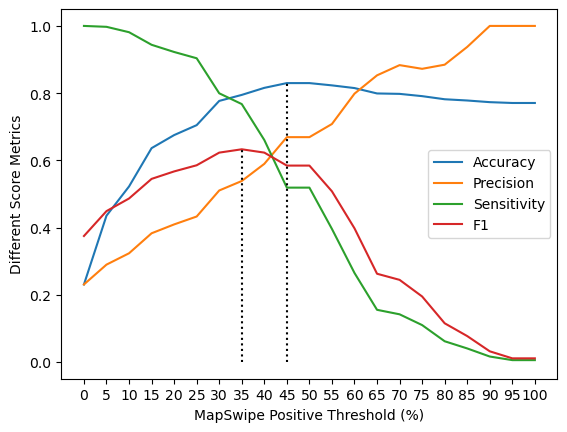

In [9]:
project.plot_measures()

"plot_ms_cop_comparison" gives the Cohen's Cappas for each damage definition threshold

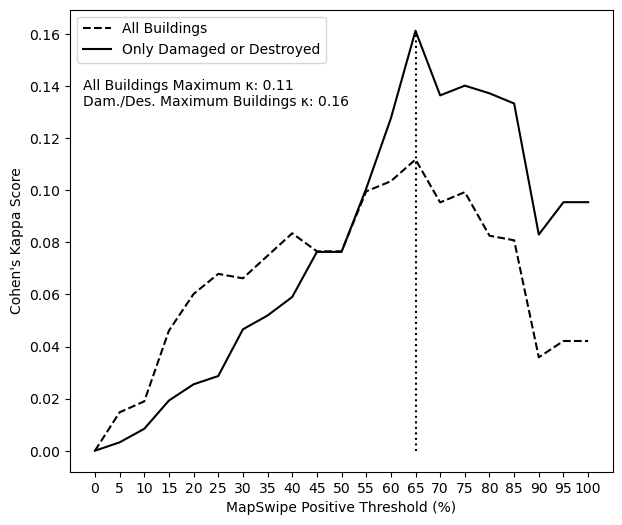

In [10]:
_ = project.plot_ms_cop_comparison()

Maps seen in the paper are created in QGIS. The builder code provides a lot of additional functions, since it was originally written for a more detailed data exploration. These other functionalities are not guarannteed to be working in this notebook, since here we only demonstrate the parts used in the AGILE paper.